In [207]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [161]:
path = "../../data/"
train_data = pd.read_csv(path + 'train_events.csv')
all_data = pd.read_csv(path + 'all_events.csv')
video = pd.read_csv(path + 'video_info_v2.csv')
targets = pd.read_csv(path + 'train_targets.csv')

In [162]:
train_data.head()

,event_timestamp,region,ua_device_type,ua_client_type,ua_os,ua_client_name,total_watchtime,rutube_video_id,viewer_uid
0,2024-06-01 06:40:58+03:00,Chelyabinsk,desktop,browser,Windows,Yandex Browser,1883,video_133074,10067243
1,2024-06-01 19:33:24+03:00,Bashkortostan Republic,smartphone,mobile app,Android,Rutube,512,video_362960,10245341
2,2024-06-01 21:30:43+03:00,St.-Petersburg,desktop,browser,Windows,Chrome,5647,video_96775,10894333
3,2024-06-01 23:03:42+03:00,Moscow,smartphone,mobile app,Android,Rutube,1521,video_161610,10029092
4,2024-06-01 22:48:09+03:00,Moscow,smartphone,mobile app,Android,Rutube,71,video_116245,10452976


In [163]:
video.head()

,rutube_video_id,title,category,duration,author_id
0,video_185549,Как собрать букет из мыльных тюльпанов - Силик...,Хобби,1559160,1015054
1,video_111035,"Осторожно, Киберземляне!, 1 сезон, 12 серия",Сериалы,1320007,1002180
2,video_476517,ПОПУЛЯРНЫЕ ВИДЕОИГРЫ в LEGO... перевод - TD BR...,Хобби,606145,1095337
3,video_157198,"Хороший лжец (фильм, 2019)",Фильмы,6577440,1043618
4,video_289824,Нашего старого гнобят по-всякому,Развлечения,859493,1009535


In [164]:
import os
import sys

original_cwd = os.getcwd()

module_dir = os.path.abspath('../../utils')
os.chdir(module_dir)
sys.path.append(module_dir)
from get_localtime import add_tz_and_localtime_column
os.chdir(original_cwd)

train_data = add_tz_and_localtime_column(train_data)
all_data = add_tz_and_localtime_column(all_data)
all_data.head()

,event_timestamp,region,ua_device_type,ua_client_type,ua_os,ua_client_name,total_watchtime,rutube_video_id,viewer_uid,timezone,local_time
0,2024-06-01 13:08:30+03:00,Tatarstan Republic,smartphone,browser,Android,Chrome Mobile,60,video_395879,10813370,Europe/Moscow,2024-06-01 13:08:30+03:00
1,2024-06-01 14:30:00+03:00,Bashkortostan Republic,smartphone,mobile app,Android,Rutube,60,video_216518,10512324,Asia/Yekaterinburg,2024-06-01 16:30:00+05:00
2,2024-06-01 18:48:12+03:00,Novosibirsk Oblast,smartphone,mobile app,Android,Rutube,121,video_41225,10951137,Asia/Novosibirsk,2024-06-01 22:48:12+07:00
3,2024-06-01 16:32:36+03:00,Moscow,desktop,browser,Windows,Yandex Browser,2324,video_215886,10912434,Europe/Moscow,2024-06-01 16:32:36+03:00
4,2024-06-01 00:57:04+03:00,Moscow Oblast,smartphone,mobile app,Android,Rutube,6830,video_43631,10223585,Europe/Moscow,2024-06-01 00:57:04+03:00


In [165]:
train_data = train_data.merge(targets, on='viewer_uid')
train_data.head()

,event_timestamp,region,ua_device_type,ua_client_type,ua_os,ua_client_name,total_watchtime,rutube_video_id,viewer_uid,timezone,local_time,age,sex,age_class
0,2024-06-01 06:40:58+03:00,Chelyabinsk,desktop,browser,Windows,Yandex Browser,1883,video_133074,10067243,Asia/Yekaterinburg,2024-06-01 08:40:58+05:00,20,female,0
1,2024-06-01 19:33:24+03:00,Bashkortostan Republic,smartphone,mobile app,Android,Rutube,512,video_362960,10245341,Asia/Yekaterinburg,2024-06-01 21:33:24+05:00,40,female,2
2,2024-06-01 21:30:43+03:00,St.-Petersburg,desktop,browser,Windows,Chrome,5647,video_96775,10894333,Europe/Moscow,2024-06-01 21:30:43+03:00,23,male,1
3,2024-06-01 23:03:42+03:00,Moscow,smartphone,mobile app,Android,Rutube,1521,video_161610,10029092,Europe/Moscow,2024-06-01 23:03:42+03:00,41,male,3
4,2024-06-01 22:48:09+03:00,Moscow,smartphone,mobile app,Android,Rutube,71,video_116245,10452976,Europe/Moscow,2024-06-01 22:48:09+03:00,38,female,2


In [166]:
print("Total unique users in train data: ", train_data['viewer_uid'].nunique())
print("Total unique users in all data: ", all_data['viewer_uid'].nunique())

Total unique users in train data:  180012
Total unique users in all data:  960885


In [167]:
print("Total unique videos in train data: ", train_data['rutube_video_id'].nunique())
print("Total unique videos in all data: ", all_data['rutube_video_id'].nunique())

Total unique videos in train data:  126248
Total unique videos in all data:  324450


<Axes: xlabel='sex', ylabel='count'>

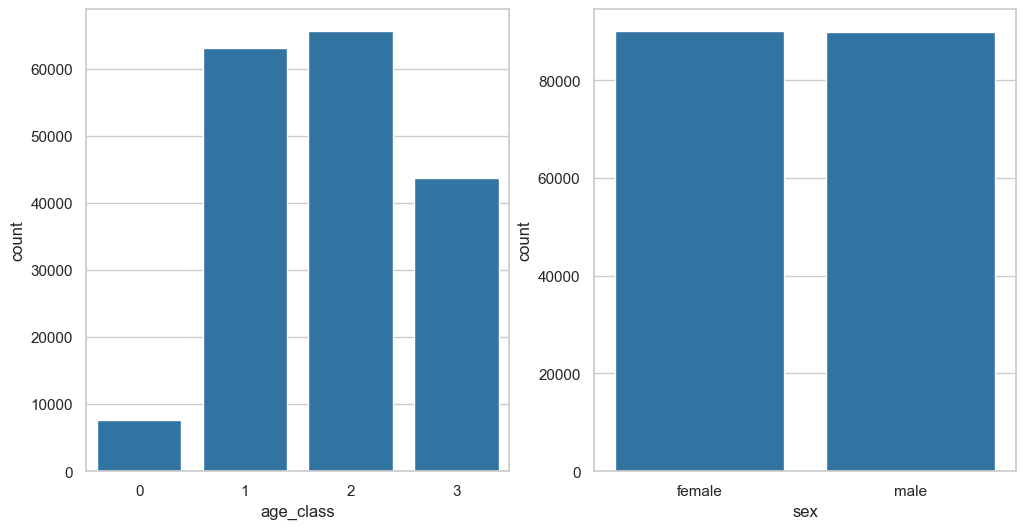

In [168]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x='age_class', data=train_data.groupby('viewer_uid').first(), ax=ax[0])
sns.countplot(x='sex', data=train_data.groupby('viewer_uid').first(), ax=ax[1])

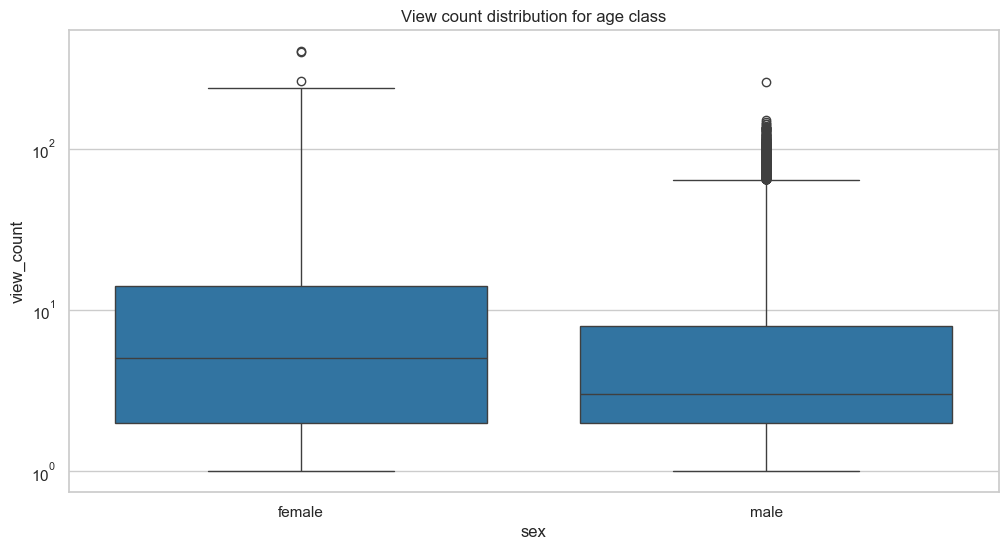

In [453]:
# View count distribution for age class and sex
view_count = train_data.groupby('viewer_uid').agg({'viewer_uid': 'count', 'age_class': 'first', 'sex': 'first'}).rename(columns={'viewer_uid': 'view_count'})

f, ax = plt.subplots(figsize=(12, 6))
ax.set_yscale("log")

sns.boxplot(x='sex', y='view_count', data=view_count)
plt.title("View count distribution for age class")
plt.show()


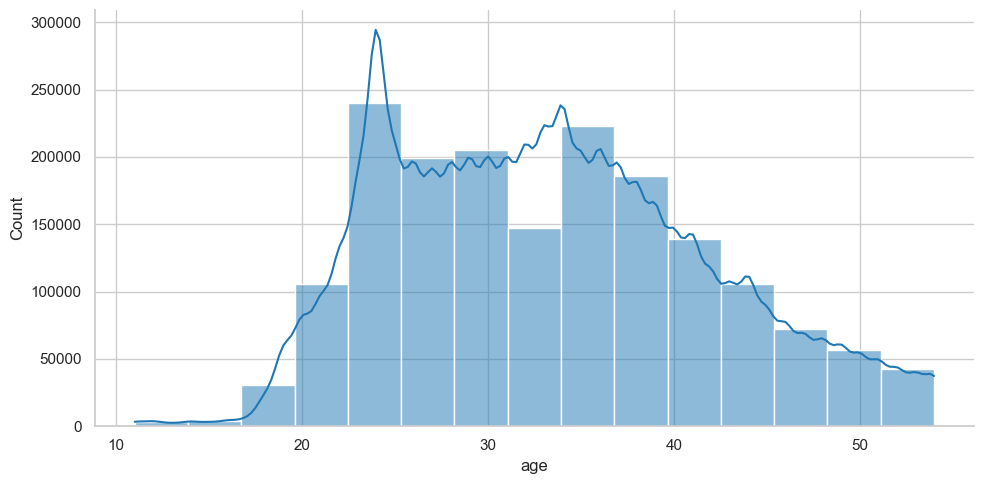

In [169]:
sns.displot(train_data['age'], bins=15, kde=True, aspect=2)
plt.show()

In [170]:
train_data = train_data.merge(video, on='rutube_video_id')
train_data.head()

,event_timestamp,region,ua_device_type,ua_client_type,ua_os,ua_client_name,total_watchtime,rutube_video_id,viewer_uid,timezone,local_time,age,sex,age_class,title,category,duration,author_id
0,2024-06-01 06:40:58+03:00,Chelyabinsk,desktop,browser,Windows,Yandex Browser,1883,video_133074,10067243,Asia/Yekaterinburg,2024-06-01 08:40:58+05:00,20,female,0,Папа с особенностями. Мужское / Женское. Выпус...,Телепередачи,2456534,1009219
1,2024-06-01 19:33:24+03:00,Bashkortostan Republic,smartphone,mobile app,Android,Rutube,512,video_362960,10245341,Asia/Yekaterinburg,2024-06-01 21:33:24+05:00,40,female,2,Comedy Club: Мальдивы | Андрей Бебуришвили,Юмор,519211,1006760
2,2024-06-01 21:30:43+03:00,St.-Petersburg,desktop,browser,Windows,Chrome,5647,video_96775,10894333,Europe/Moscow,2024-06-01 21:30:43+03:00,23,male,1,"Новая Битва экстрасенсов, 24 сезон, 11 выпуск",Телепередачи,5518280,1009257
3,2024-06-01 23:03:42+03:00,Moscow,smartphone,mobile app,Android,Rutube,1521,video_161610,10029092,Europe/Moscow,2024-06-01 23:03:42+03:00,41,male,3,Сергей Орлов-снял дом!!!,Разное,1522069,1058671
4,2024-06-01 22:48:09+03:00,Moscow,smartphone,mobile app,Android,Rutube,71,video_116245,10452976,Europe/Moscow,2024-06-01 22:48:09+03:00,38,female,2,Ищем сокровища в Полевском | Уральская Флоренц...,Путешествия,1249920,1020020


/var/folders/94/nzsdn_8d0xq75jf__rhww7hr0000gn/T/ipykernel_38334/2605372372.py:3: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.displot(train_data[(train_data.percent_watched > 0) & (train_data.percent_watched <= 1)],


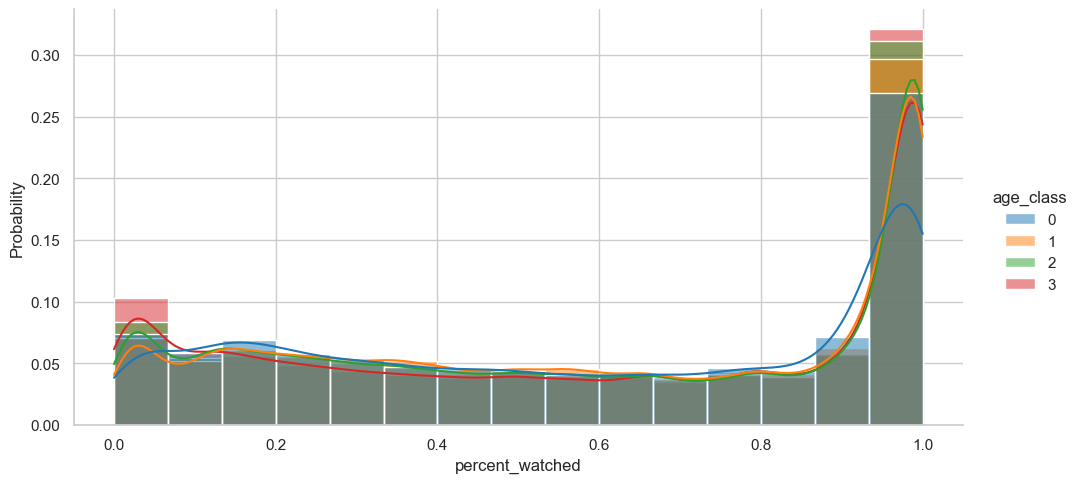

In [171]:
train_data['percent_watched'] = train_data['total_watchtime'] / train_data['duration'] * 1000
palette = sns.color_palette("tab10")
sns.displot(train_data[(train_data.percent_watched > 0) & (train_data.percent_watched <= 1)], 
            x="percent_watched", bins=15, kde=True, hue='age_class', 
            aspect=2, palette=palette, stat='probability', common_norm=False)
plt.show()

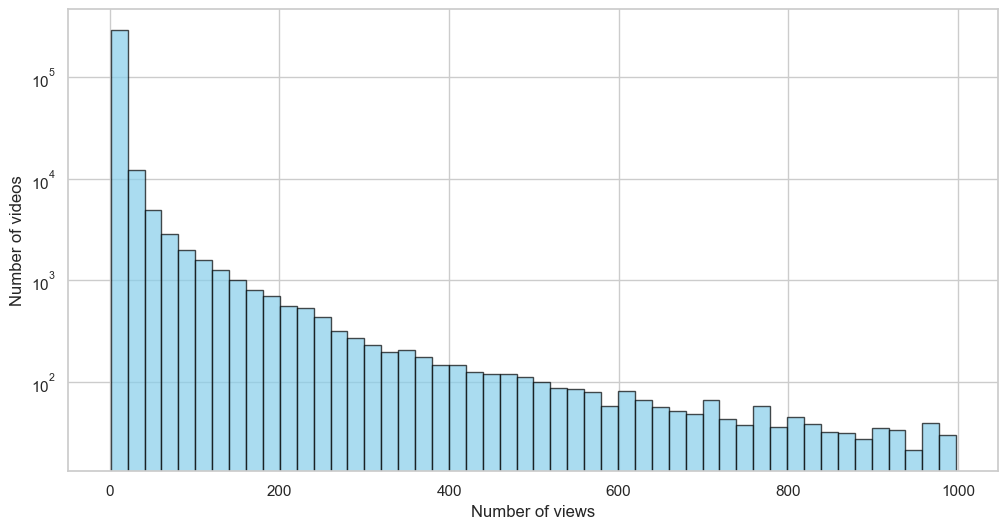

In [273]:
video_stats = all_data.groupby('rutube_video_id').size().reset_index(name='views')

plt.figure(figsize=(12, 6))
plt.hist(video_stats.query('views < 1000')['views'], 
         bins=50, color='skyblue', edgecolor='black', alpha=0.7, log=True)
plt.xlabel('Number of views')
plt.ylabel('Number of videos')
plt.show()

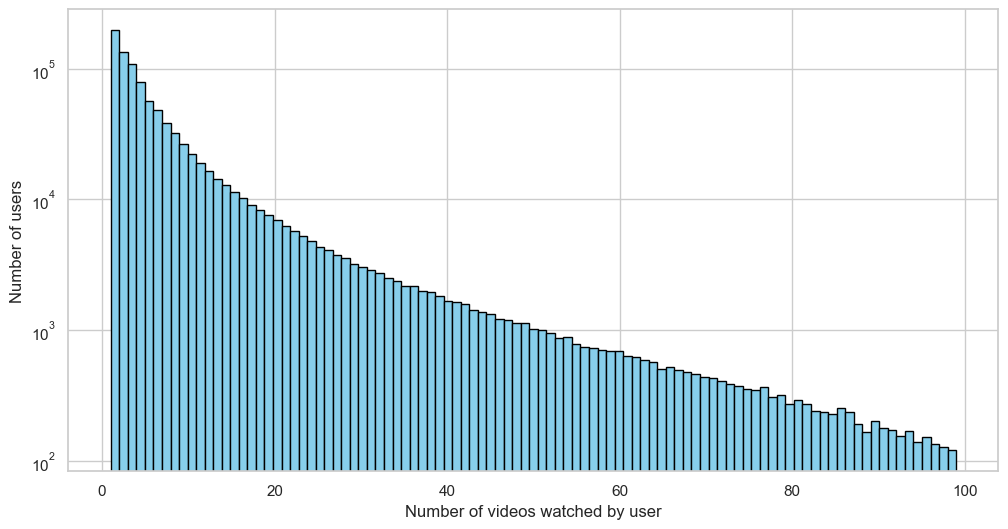

In [267]:
user_stats = all_data.groupby('viewer_uid').size().reset_index().rename(columns={0: 'num_videos_watched'})

plt.figure(figsize=(12, 6))
plt.hist(user_stats.query("num_videos_watched < 100")['num_videos_watched'], bins=99, log=True, color='skyblue', edgecolor='black')
plt.xlabel('Number of videos watched by user')
plt.ylabel('Number of users')

plt.show()

In [195]:
videos_popularity = all_data.groupby('rutube_video_id')['viewer_uid'].nunique()
videos_popularity.name = 'popularity'
all_data = all_data.merge(videos_popularity, on='rutube_video_id')
all_data.head()

,event_timestamp,region,ua_device_type,ua_client_type,ua_os,ua_client_name,total_watchtime,rutube_video_id,viewer_uid,timezone,local_time,popularity_x,popularity_y,popularity
0,2024-06-01 13:08:30+03:00,Tatarstan Republic,smartphone,browser,Android,Chrome Mobile,60,video_395879,10813370,Europe/Moscow,2024-06-01 13:08:30+03:00,214,214,214
1,2024-06-01 14:30:00+03:00,Bashkortostan Republic,smartphone,mobile app,Android,Rutube,60,video_216518,10512324,Asia/Yekaterinburg,2024-06-01 16:30:00+05:00,437,437,437
2,2024-06-01 18:48:12+03:00,Novosibirsk Oblast,smartphone,mobile app,Android,Rutube,121,video_41225,10951137,Asia/Novosibirsk,2024-06-01 22:48:12+07:00,1,1,1
3,2024-06-01 16:32:36+03:00,Moscow,desktop,browser,Windows,Yandex Browser,2324,video_215886,10912434,Europe/Moscow,2024-06-01 16:32:36+03:00,96,96,96
4,2024-06-01 00:57:04+03:00,Moscow Oblast,smartphone,mobile app,Android,Rutube,6830,video_43631,10223585,Europe/Moscow,2024-06-01 00:57:04+03:00,334,334,334


100%|██████████| 100/100 [00:54<00:00,  1.84it/s]


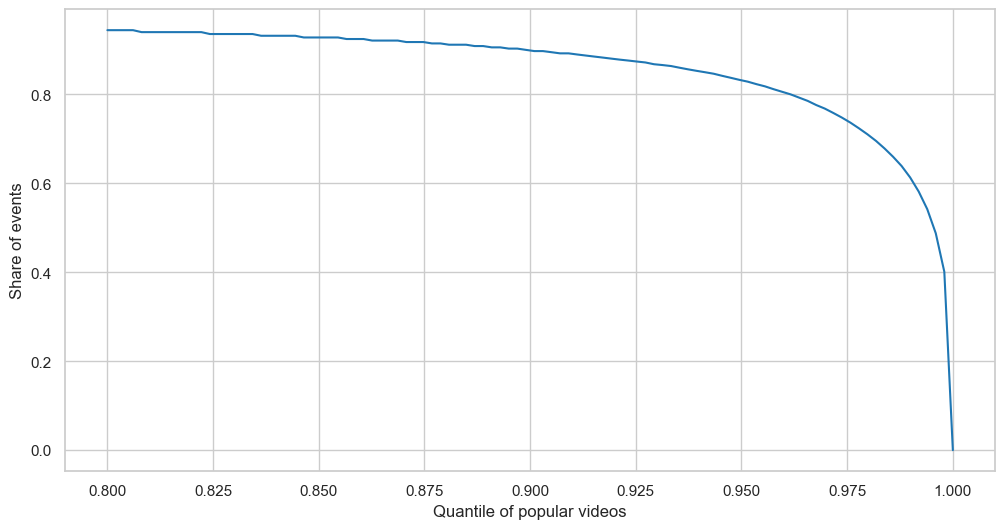

In [208]:
# Graph x - quantile of popular videos, y - share of events for this quantile
quantiles = np.linspace(0.8, 1, 100)
shares = []
for q in tqdm(quantiles):
    threshold = videos_popularity.quantile(q)
    shares.append(all_data.query(f'popularity > {threshold}').shape[0] / all_data.shape[0])
plt.figure(figsize=(12, 6))
plt.plot(quantiles, shares)
plt.xlabel('Quantile of popular videos')
plt.ylabel('Share of events')
plt.show()

100%|██████████| 100/100 [02:01<00:00,  1.22s/it]


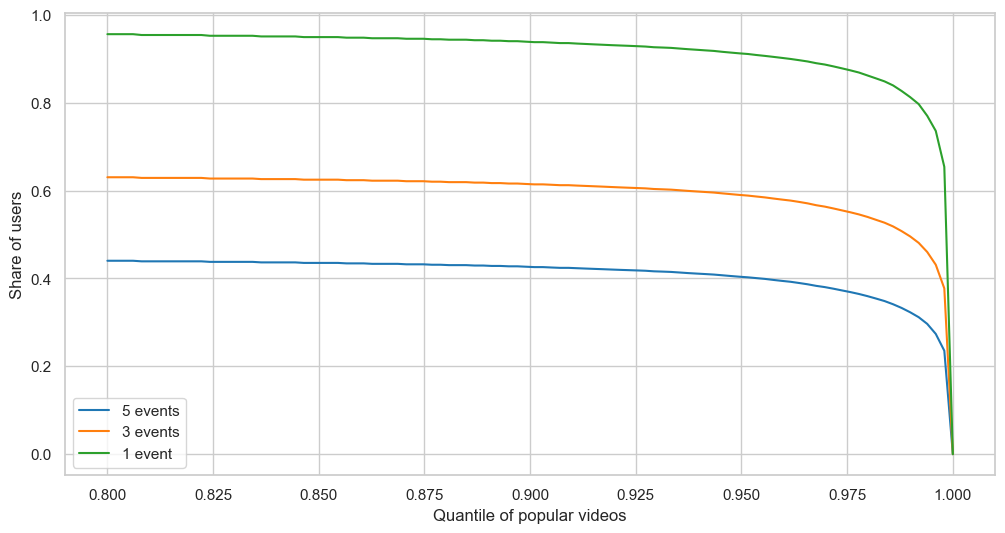

In [210]:
# x - quantile of popular videos, y - share of users that have at least 5 events for this quantile

quantiles = np.linspace(0.8, 1, 100)
shares_5 = []
shares_3 = []
shares_1 = []
for q in tqdm(quantiles):
    threshold = videos_popularity.quantile(q)
    all_data_filtered = all_data[all_data.popularity > threshold]
    shares_5.append(all_data_filtered.groupby('viewer_uid').size().reset_index().rename(columns={0: 'count'}).query('count >= 5').shape[0] / all_data['viewer_uid'].nunique())
    shares_3.append(all_data_filtered.groupby('viewer_uid').size().reset_index().rename(columns={0: 'count'}).query('count >= 3').shape[0] / all_data['viewer_uid'].nunique())
    shares_1.append(all_data_filtered['viewer_uid'].nunique() / all_data['viewer_uid'].nunique())
    
plt.figure(figsize=(12, 6))
plt.plot(quantiles, shares_5)
plt.plot(quantiles, shares_3)
plt.plot(quantiles, shares_1)
plt.legend(['5 events', '3 events', '1 event'])
plt.xlabel('Quantile of popular videos')
plt.ylabel('Share of users')
plt.show()

In [213]:
videos_popularity.quantile(0.95)

np.float64(54.0)

<Axes: >

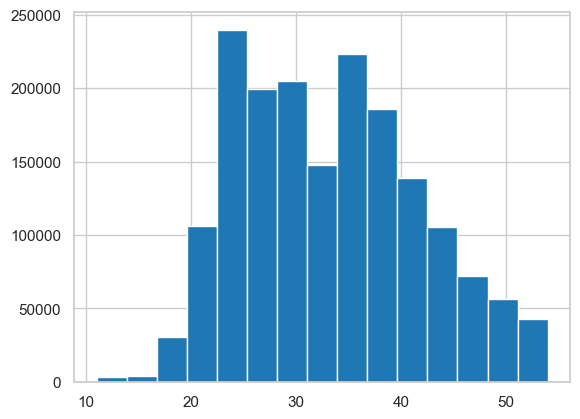

In [215]:
train_data.age.hist(bins=15)

In [244]:
train_data['hour'] = pd.to_datetime(train_data['local_time'].apply(lambda t: t.replace(tzinfo=None))).dt.hour
train_data['weekday'] = pd.to_datetime(train_data['local_time'].apply(lambda t: t.replace(tzinfo=None))).dt.weekday
train_data['holiday'] = train_data['weekday'].apply(lambda x: 1 if x >= 5 else 0)

(0.0, 24.0)

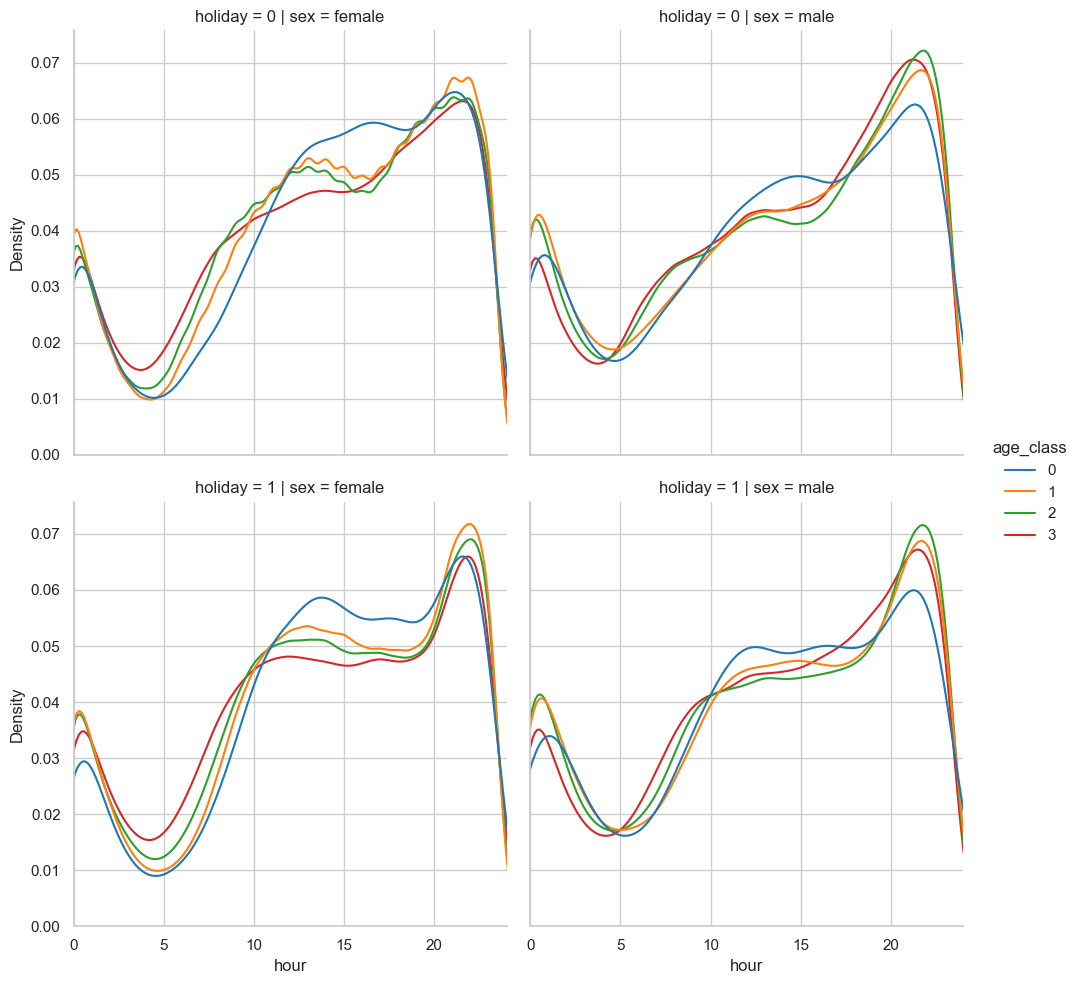

In [249]:
sns.displot(kind='kde', x='hour', data=train_data, palette='tab10',
            hue='age_class', common_norm=False, col='sex', row='holiday')
plt.xlim(0, 24)

<Axes: >

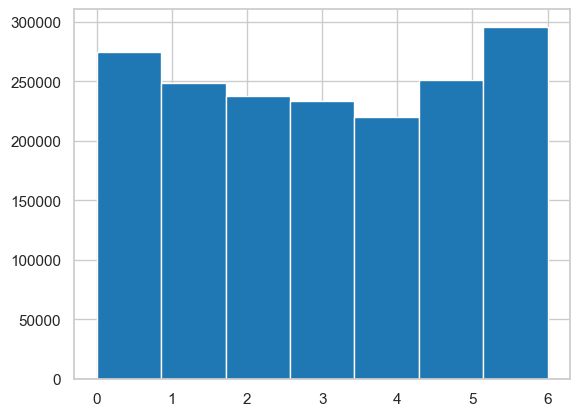

In [251]:
train_data.weekday.hist(bins=7)

In [252]:
train_data.

,event_timestamp,region,ua_device_type,ua_client_type,ua_os,ua_client_name,total_watchtime,rutube_video_id,viewer_uid,timezone,...,sex,age_class,title,category,duration,author_id,percent_watched,hour,weekday,holiday
0,2024-06-01 06:40:58+03:00,Chelyabinsk,desktop,browser,Windows,Yandex Browser,1883,video_133074,10067243,Asia/Yekaterinburg,...,female,0,Папа с особенностями. Мужское / Женское. Выпус...,Телепередачи,2456534,1009219,0.766527,8,5,1
1,2024-06-01 19:33:24+03:00,Bashkortostan Republic,smartphone,mobile app,Android,Rutube,512,video_362960,10245341,Asia/Yekaterinburg,...,female,2,Comedy Club: Мальдивы | Андрей Бебуришвили,Юмор,519211,1006760,0.986112,21,5,1
2,2024-06-01 21:30:43+03:00,St.-Petersburg,desktop,browser,Windows,Chrome,5647,video_96775,10894333,Europe/Moscow,...,male,1,"Новая Битва экстрасенсов, 24 сезон, 11 выпуск",Телепередачи,5518280,1009257,1.023326,21,5,1
3,2024-06-01 23:03:42+03:00,Moscow,smartphone,mobile app,Android,Rutube,1521,video_161610,10029092,Europe/Moscow,...,male,3,Сергей Орлов-снял дом!!!,Разное,1522069,1058671,0.999298,23,5,1
4,2024-06-01 22:48:09+03:00,Moscow,smartphone,mobile app,Android,Rutube,71,video_116245,10452976,Europe/Moscow,...,female,2,Ищем сокровища в Полевском | Уральская Флоренц...,Путешествия,1249920,1020020,0.056804,22,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759611,2024-06-30 17:08:36+03:00,Moscow,smartphone,mobile app,Android,Rutube,4230,video_162776,10026914,Europe/Moscow,...,female,2,"Я знаю, но 1 сезон 3 серия",Сериалы,4480915,1095392,0.944004,17,6,1
1759612,2024-06-30 01:20:16+03:00,Moscow,smartphone,browser,Android,Firefox Mobile,382,video_316157,10417567,Europe/Moscow,...,male,3,РЕАКЦИЯ ЮРИСТА НА TikTok | НЕАДЕКВАТНЫЕ СОТРУД...,Обучение,320134,1033688,1.193250,1,6,1
1759613,2024-06-30 22:37:04+03:00,St.-Petersburg,desktop,browser,Windows,Microsoft Edge,1342,video_83304,10009094,Europe/Moscow,...,male,1,Свои чужие дети. Мужское / Женское. Выпуск от ...,Телепередачи,3125675,1009219,0.429347,22,6,1
1759614,2024-06-30 11:33:09+03:00,St.-Petersburg,smartphone,mobile app,Android,Rutube,801,video_132769,10574374,Europe/Moscow,...,female,3,"Коля, Коля, Николай. Мужское / Женское. Выпуск...",Телепередачи,2401283,1009219,0.333572,11,6,1


## ALS

In [362]:
all_plus_train = pd.concat([all_data, train_data])
all_plus_train.shape

(10199240, 29)

In [363]:
popular_videos = all_plus_train.groupby('rutube_video_id').size().reset_index(name='views').sort_values('views', ascending=False).query('views >= 50')
popular_videos.shape

(20900, 2)

In [364]:
# Choose users with at least 5 events on popular videos
active_users = all_plus_train[all_plus_train.rutube_video_id.isin(popular_videos.rutube_video_id)].groupby('viewer_uid').size().reset_index().rename(columns={0: 'count'}).query('count >= 5')
active_users.shape

(476288, 2)

In [367]:
all_plus_train['score'] = all_plus_train['total_watchtime'] / all_plus_train['duration'] * 1000 + 0.1

In [365]:
all_plus_train['video_id'] = all_plus_train['rutube_video_id'].str.split('_').apply(lambda x: x[1]).astype(int)
all_plus_train['video_id']

0          395879
1          216518
2           41225
3          215886
4           43631
            ...  
1759611    162776
1759612    316157
1759613     83304
1759614    132769
1759615     19793
Name: video_id, Length: 10199240, dtype: int64

(10199240, 29)

In [419]:
import numpy as np
import scipy.sparse as sparse
from implicit.als import AlternatingLeastSquares

# Train ALS 

# Encode the users and videos
all_plus_train['uid'] = all_plus_train['viewer_uid'].astype("category").cat.codes
all_plus_train['vid'] = all_plus_train['video_id'].astype("category").cat.codes

# Convert the data into a sparse matrix
als_data = all_plus_train[all_plus_train.viewer_uid.isin(active_users.viewer_uid) & all_plus_train.rutube_video_id.isin(popular_videos.rutube_video_id)]

als_data['uid'] = als_data['viewer_uid'].astype("category").cat.codes
als_data['vid'] = als_data['video_id'].astype("category").cat.codes

ratings_matrix = sparse.coo_matrix((als_data['score'], (als_data['vid'], als_data['uid'])))
print(ratings_matrix)

# Initialize the ALS model
model = AlternatingLeastSquares(factors=50, regularization=0.1, iterations=30, calculate_training_loss=True)

# Train the model on the sparse matrix (using item-item interactions)
ratings_matrix_csr = ratings_matrix.tocsr()
model.fit(ratings_matrix_csr, show_progress=True)

# Example: Print factors for item 0
item_factors = model.item_factors
print(item_factors[0])


/var/folders/94/nzsdn_8d0xq75jf__rhww7hr0000gn/T/ipykernel_38334/3645972019.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  als_data['uid'] = als_data['viewer_uid'].astype("category").cat.codes
/var/folders/94/nzsdn_8d0xq75jf__rhww7hr0000gn/T/ipykernel_38334/3645972019.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  als_data['vid'] = als_data['video_id'].astype("category").cat.codes


<COOrdinate sparse matrix of dtype 'float64'
	with 7551387 stored elements and shape (20897, 476288)>
  Coords	Values
  (17137, 360172)	0.2800109806698209
  (9376, 223001)	0.12399736988826025
  (9356, 398782)	1.0833320146078116
  (1951, 102815)	2.002837707724128
  (16877, 296256)	0.9433884983671887
  (6212, 404510)	1.0974817673414659
  (19600, 228220)	0.42025926660627944
  (20413, 312836)	1.086063313075102
  (20582, 237842)	1.0887680394618438
  (3656, 192843)	1.0962346875602602
  (8188, 315053)	0.4030236577746501
  (1611, 216918)	0.7386367567748682
  (15445, 416512)	0.2007894633843236
  (4415, 103891)	1.075179289110285
  (15950, 77793)	1.0869225128330482
  (18340, 44173)	1.0986708019494904
  (6541, 237961)	0.33784381172426925
  (11802, 370834)	0.9933215039618196
  (12886, 381812)	1.0460894928121143
  (11687, 133105)	0.10521825345057009
  (17486, 211529)	0.35969957952640386
  (13063, 108576)	0.20071629872748264
  (12896, 248383)	0.45379958027045086
  (20474, 411744)	1.1007091342526933
 

  0%|          | 0/30 [00:00<?, ?it/s]

[ 0.04733564 -0.04668791  0.12439086 -0.05651955  0.04548353  0.04080996
  0.01184032  0.14612965  0.06895095  0.02843514  0.00351038  0.07025661
 -0.09680434  0.02204256  0.06380389 -0.01765426 -0.05264495  0.0684016
  0.03418063 -0.01094018 -0.00542858 -0.12152571  0.01907229  0.0154151
 -0.00510832 -0.09222257  0.08908736  0.19804886  0.07384997  0.04726589
  0.16238669  0.03732372 -0.04631322  0.05766579 -0.04664741 -0.07271698
 -0.02600609 -0.01355537 -0.03955582  0.01522099  0.08081793  0.02547323
 -0.10839612  0.01437675 -0.02939793 -0.15185979  0.01644766 -0.01517133
  0.06429066  0.1876203 ]


In [420]:
user_id = 15121
user_items = ratings_matrix_csr[user_id]
scores = model.user_factors[user_id].dot(item_factors.T)
print(scores.max())

0.012520389


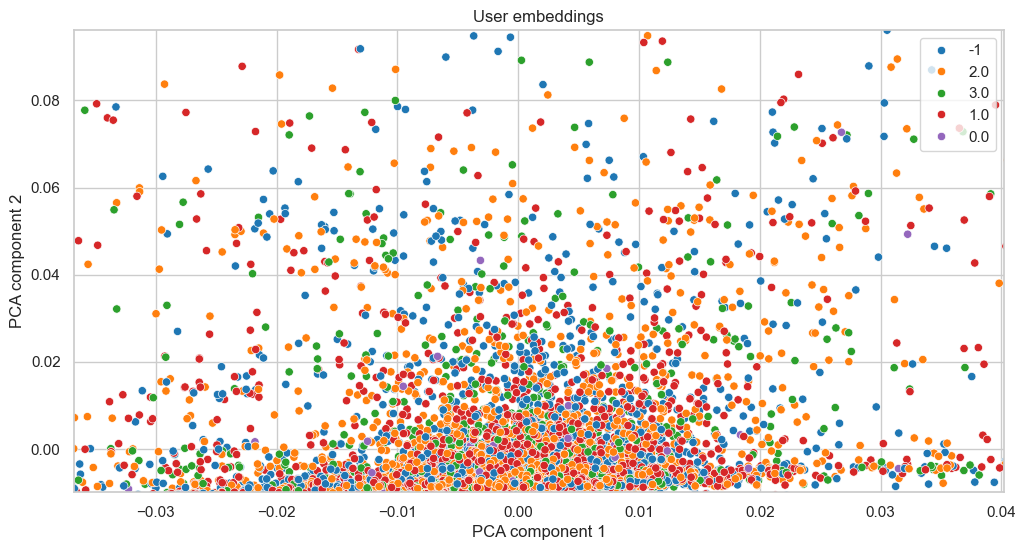

In [459]:
# PCA for user embeddings

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
user_embeddings = model.user_factors
user_embeddings_pca = pca.fit_transform(user_embeddings)

uid_to_age_class = all_plus_train.groupby('uid')['age_class'].first().fillna('-1').to_dict()
uid_to_sex = all_plus_train.groupby('uid')['sex'].first().fillna('unk').to_dict()

plt.figure(figsize=(12, 6))
sns.scatterplot(x=user_embeddings_pca[:, 0],
                y=user_embeddings_pca[:, 1],
                hue=[uid_to_age_class[i] for i in range(user_embeddings.shape[0])],
                palette='tab10')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.title('User embeddings')
# xlim quantiles
plt.xlim(np.quantile(user_embeddings_pca[:, 0], 0.01), np.quantile(user_embeddings_pca[:, 0], 0.99))
plt.ylim(np.quantile(user_embeddings_pca[:, 1], 0.01), np.quantile(user_embeddings_pca[:, 1], 0.99))
plt.show()

In [483]:
# Try to predict age class with user embeddings using KNN

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# f1
from sklearn.metrics import f1_score, classification_report

tree_data = als_data[als_data.age_class.notnull()].query(f'uid < {user_embeddings.shape[0]}')
print(tree_data.shape)
embeds = model.user_factors

all_users = tree_data['uid'].unique().tolist()
train_users = np.random.choice(all_users, int(0.8 * len(all_users)), replace=False)
test_users = list(set(all_users) - set(train_users))

X_train = embeds[train_users]
X_test = embeds[test_users]
y_train = tree_data.groupby('uid')['age_class'].first().loc[train_users].values
y_test = tree_data.groupby('uid')['age_class'].first().loc[test_users].values

X_train.shape, X_test.shape, y_train.shape, y_test.shape


(313981, 29)


((13016, 50), (3255, 50), (13016,), (3255,))

In [484]:
pd.Series(y_train).value_counts()

2.0    5586
1.0    5277
3.0    2017
0.0     136
Name: count, dtype: int64

In [487]:
knn = KNeighborsClassifier(n_neighbors=19, weights='distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        33
         1.0       0.40      0.44      0.42      1294
         2.0       0.44      0.54      0.49      1441
         3.0       0.15      0.01      0.03       487

    accuracy                           0.42      3255
   macro avg       0.25      0.25      0.23      3255
weighted avg       0.38      0.42      0.39      3255

